# Results

In [90]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [92]:
# Read in Parquet File
df_final = pd.read_parquet('02_Clean_Data/df_final.parquet')

# Shuffle Rows of Data Using the Same Random Seed Used in the Modeling Notebook
df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)

In [93]:
# Import Results Data
DT_results = pd.read_csv('05_Testing_Results/DecisionTree_results.csv')
XGB_results = pd.read_csv('05_Testing_Results/XGBoost_results.csv')
RNN_results = pd.read_csv('05_Testing_Results/RNN_01_results.csv')
LSTM_01_results = pd.read_csv('05_Testing_Results/lstm_01_results.csv')
LSTM_02_results = pd.read_csv('05_Testing_Results/lstm_02_results.csv')
LSTM_03_results = pd.read_csv('05_Testing_Results/lstm_03_results.csv')
LSTM_04_results = pd.read_csv('05_Testing_Results/lstm_04_results.csv')
GRU_results = pd.read_csv('05_Testing_Results/GRU_results.csv')
BINOM_results = pd.read_csv('05_Testing_Results/Binomial_results.csv')

In [94]:
# Recreate Splits
df_final_train = df_final[:int(0.98 * len(df_final))]
df_final_val = df_final[int(0.98 * len(df_final)):int(0.99 * len(df_final))]
df_final_test = df_final[int(0.99 * len(df_final)):]

In [95]:
# Filter all the columns that start with 'Price-'
price_columns = [col for col in df_final_test.columns if col.startswith('Price-')]
price_test = df_final_test[price_columns]
# Make a Column with Each Rows Standard Deviation
df_final_test['Historical Volatility'] = price_test.std(axis=1)

In [96]:
# Remove all the columns that start with 'Price-', 'rate-', or 'Dividends-'
# Except for 'Price-0', 'rate-0', and 'Dividends-0' from df_final_test
# and create a new dataframe called df_final_test_clean
df_filt = df_final_test[[col for col in df_final_test.columns if col.startswith('Price-0')
                                     or col.startswith('rate-0')
                                     or col.startswith('Dividends-0')]]
df_filt = pd.concat([df_final_test[['ID', 'Date', 'Ticker', 'Call', 'Close',
                                             'Stock Ticker', 'Days to Expiration', 'strike',
                                             'impliedVolatility', 'Historical Volatility']], df_filt], axis=1)

In [97]:
# Rename the columns
df_filt.columns = ['ID', 'Date', 'Option Ticker', 'Option Type', 'Option Price', 'Stock Ticker', 'Days to Expiration',
                     'Strike Price', 'Implied Volatility', 'Historical Volatility', 'Underlying Price', 'Risk Free Rate', 'Dividends']
# Revert 'Option Type' to 'Call' or 'Put'
df_filt['Option Type'] = df_filt['Option Type'].apply(lambda x: 'Call' if x == 1 else 'Put')
# Sort df_filt by 'Option Price' in descending order
df_filt = df_filt.sort_values(by='Option Price', ascending=False)

In [98]:
# Reset Index of df_filt
df_filt = df_filt.reset_index(drop=True)

In [99]:
# Append the 'Absolute Error' columns from the results dataframes to df_filt
df_filt['DT Absolute Error'] = DT_results['Absolute Error']
df_filt['XGB Absolute Error'] = XGB_results['Absolute Error']
df_filt['RNN Absolute Error'] = RNN_results['Absolute Error']
df_filt['LSTM Absolute Error'] = LSTM_01_results['Absolute Error']
df_filt['2 Layer LSTM Absolute Error'] = LSTM_02_results['Absolute Error']
df_filt['4 Layer LSTM Absolute Error'] = LSTM_03_results['Absolute Error']
df_filt['Bidirectional LSTM Absolute Error'] = LSTM_04_results['Absolute Error']
df_filt['GRU Absolute Error'] = GRU_results['Absolute Error']
df_filt['Binomial Absolute Error'] = BINOM_results['Absolute Error']

# Append the 'Absolute Percentage Error' columns from the results dataframes to df_filt
df_filt['DT Absolute Percentage Error'] = DT_results['Absolute Percentage Error']
df_filt['XGB Absolute Percentage Error'] = XGB_results['Absolute Percentage Error']
df_filt['RNN Absolute Percentage Error'] = RNN_results['Absolute Percentage Error']
df_filt['LSTM Absolute Percentage Error'] = LSTM_01_results['Absolute Percentage Error']
df_filt['2 Layer LSTM Absolute Percentage Error'] = LSTM_02_results['Absolute Percentage Error']
df_filt['4 Layer LSTM Absolute Percentage Error'] = LSTM_03_results['Absolute Percentage Error']
df_filt['Bidirectional LSTM Absolute Percentage Error'] = LSTM_04_results['Absolute Percentage Error']
df_filt['GRU Absolute Percentage Error'] = GRU_results['Absolute Percentage Error']
df_filt['Binomial Absolute Percentage Error'] = BINOM_results['Absolute Percentage Error']

In [100]:
df_filt.head()

,ID,Date,Option Ticker,Option Type,Option Price,Stock Ticker,Days to Expiration,Strike Price,Implied Volatility,Historical Volatility,...,Binomial Absolute Error,DT Absolute Percentage Error,XGB Absolute Percentage Error,RNN Absolute Percentage Error,LSTM Absolute Percentage Error,2 Layer LSTM Absolute Percentage Error,4 Layer LSTM Absolute Percentage Error,Bidirectional LSTM Absolute Percentage Error,GRU Absolute Percentage Error,Binomial Absolute Percentage Error
0,ASML-2022-09-19,2022-09-19,ASML230421P00720000,Put,257.059998,ASML,214,720.0,0.467168,23.098361,...,411.125090,0.930532,0.426245,0.161171,0.486305,0.202493,0.406470,0.016686,0.038266,1.599335
1,ADBE-2022-11-03,2022-11-03,ADBE230421P00480000,Put,185.600006,ADBE,169,480.0,2.705326,14.476594,...,262.085279,0.040410,0.035668,0.086544,0.361349,0.140195,0.388517,0.020816,0.023753,1.412097
2,NVDA-2023-03-31,2023-03-31,NVDA230421C00150000,Call,128.350006,NVDA,21,150.0,1.750001,16.129792,...,inf,0.113710,0.004687,0.078054,0.194223,0.156358,0.592344,0.041131,0.057082,inf
3,AVGO-2022-11-10,2022-11-10,AVGO230421C00400000,Call,114.000000,AVGO,162,400.0,1.431643,20.173055,...,inf,0.698512,0.114365,0.048602,0.269592,0.136874,0.464318,0.014684,0.029868,inf
4,ADBE-2022-12-12,2022-12-12,ADBE230421P00445000,Put,109.610001,ADBE,130,445.0,2.929995,6.552865,...,314.776760,0.008724,0.094788,0.095576,0.108607,0.048256,0.419577,0.029842,0.025731,2.871789


In [101]:
# Function to Plot a Value's Absolute Error for Every Model
def plot_absolute_error(df, x_value, x_log=True, y_log=True):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
    sns.scatterplot(data=df_filt, x=x_value, y='DT Absolute Error', ax=axes[0, 0])
    sns.scatterplot(data=df_filt, x=x_value, y='XGB Absolute Error', ax=axes[0, 1])
    sns.scatterplot(data=df_filt, x=x_value, y='RNN Absolute Error', ax=axes[1, 0])
    sns.scatterplot(data=df_filt, x=x_value, y='LSTM Absolute Error', ax=axes[1, 1])
    sns.scatterplot(data=df_filt, x=x_value, y='2 Layer LSTM Absolute Error', ax=axes[2, 0])
    sns.scatterplot(data=df_filt, x=x_value, y='4 Layer LSTM Absolute Error', ax=axes[2, 1])
    sns.scatterplot(data=df_filt, x=x_value, y='Bidirectional LSTM Absolute Error', ax=axes[0, 2])
    sns.scatterplot(data=df_filt, x=x_value, y='GRU Absolute Error', ax=axes[1, 2])
    sns.scatterplot(data=df_filt, x=x_value, y='Binomial Absolute Error', ax=axes[2, 2])

    if x_log == True:
        # Make x axis log scale
        axes[0, 0].set_xscale('log')
        axes[0, 1].set_xscale('log')
        axes[1, 0].set_xscale('log')
        axes[1, 1].set_xscale('log')
        axes[2, 0].set_xscale('log')
        axes[2, 1].set_xscale('log')
        axes[0, 2].set_xscale('log')
        axes[1, 2].set_xscale('log')
        axes[2, 2].set_xscale('log')

    if y_log == True:
        # Make y axis log scale
        axes[0, 0].set_yscale('log')
        axes[0, 1].set_yscale('log')
        axes[1, 0].set_yscale('log')
        axes[1, 1].set_yscale('log')
        axes[2, 0].set_yscale('log')
        axes[2, 1].set_yscale('log')
        axes[0, 2].set_yscale('log')
        axes[1, 2].set_yscale('log')
        axes[2, 2].set_yscale('log')

    # Add Individual Titles
    axes[0, 0].set_title('Decision Tree')
    axes[0, 1].set_title('XGBoost')
    axes[1, 0].set_title('RNN')
    axes[1, 1].set_title('LSTM')
    axes[2, 0].set_title('2 Layer LSTM')
    axes[2, 1].set_title('4 Layer LSTM')
    axes[0, 2].set_title('Bidirectional LSTM')
    axes[1, 2].set_title('GRU')
    axes[2, 2].set_title('Binomial')

    # Add Common X and Y Labels
    fig.text(0.5, 0.04, x_value, ha='center', va='center', fontsize=14)
    fig.text(0.04, 0.5, 'Absolute Error', ha='center', va='center', rotation='vertical', fontsize=14)

    # Remove Individual x and y Labels
    axes[0, 0].set_xlabel('')
    axes[0, 0].set_ylabel('')
    axes[0, 1].set_xlabel('')
    axes[0, 1].set_ylabel('')
    axes[1, 0].set_xlabel('')
    axes[1, 0].set_ylabel('')
    axes[1, 1].set_xlabel('')
    axes[1, 1].set_ylabel('')
    axes[2, 0].set_xlabel('')
    axes[2, 0].set_ylabel('')
    axes[2, 1].set_xlabel('')
    axes[2, 1].set_ylabel('')
    axes[0, 2].set_xlabel('')
    axes[0, 2].set_ylabel('')
    axes[1, 2].set_xlabel('')
    axes[1, 2].set_ylabel('')
    axes[2, 2].set_xlabel('')
    axes[2, 2].set_ylabel('')

    # Add More Space Between Models and all the plots
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    # Title the entire figure
    fig.suptitle('Absolute Error Histograms', fontsize=16)

In [102]:
# Function to Plot a Value's Absolute Percentage Error for Every Model
def plot_absolute_percentage_error(df, x_value, x_log=True, y_log=True):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
    sns.scatterplot(data=df_filt, x=x_value, y='DT Absolute Percentage Error', ax=axes[0, 0])
    sns.scatterplot(data=df_filt, x=x_value, y='XGB Absolute Percentage Error', ax=axes[0, 1])
    sns.scatterplot(data=df_filt, x=x_value, y='RNN Absolute Percentage Error', ax=axes[1, 0])
    sns.scatterplot(data=df_filt, x=x_value, y='LSTM Absolute Percentage Error', ax=axes[1, 1])
    sns.scatterplot(data=df_filt, x=x_value, y='2 Layer LSTM Absolute Percentage Error', ax=axes[2, 0])
    sns.scatterplot(data=df_filt, x=x_value, y='4 Layer LSTM Absolute Percentage Error', ax=axes[2, 1])
    sns.scatterplot(data=df_filt, x=x_value, y='Bidirectional LSTM Absolute Percentage Error', ax=axes[0, 2])
    sns.scatterplot(data=df_filt, x=x_value, y='GRU Absolute Percentage Error', ax=axes[1, 2])
    sns.scatterplot(data=df_filt, x=x_value, y='Binomial Absolute Percentage Error', ax=axes[2, 2])

    if x_log == True:
        # Make x axis log scale
        axes[0, 0].set_xscale('log')
        axes[0, 1].set_xscale('log')
        axes[1, 0].set_xscale('log')
        axes[1, 1].set_xscale('log')
        axes[2, 0].set_xscale('log')
        axes[2, 1].set_xscale('log')
        axes[0, 2].set_xscale('log')
        axes[1, 2].set_xscale('log')
        axes[2, 2].set_xscale('log')

    if y_log == True:
        # Make y axis log scale
        axes[0, 0].set_yscale('log')
        axes[0, 1].set_yscale('log')
        axes[1, 0].set_yscale('log')
        axes[1, 1].set_yscale('log')
        axes[2, 0].set_yscale('log')
        axes[2, 1].set_yscale('log')
        axes[0, 2].set_yscale('log')
        axes[1, 2].set_yscale('log')
        axes[2, 2].set_yscale('log')

    # Add Individual Titles
    axes[0, 0].set_title('Decision Tree')
    axes[0, 1].set_title('XGBoost')
    axes[1, 0].set_title('RNN')
    axes[1, 1].set_title('LSTM')
    axes[2, 0].set_title('2 Layer LSTM')
    axes[2, 1].set_title('4 Layer LSTM')
    axes[0, 2].set_title('Bidirectional LSTM')
    axes[1, 2].set_title('GRU')
    axes[2, 2].set_title('Binomial')

    # Add Common X and Y Labels
    fig.text(0.5, 0.04, x_value, ha='center', va='center', fontsize=14)
    fig.text(0.04, 0.5, 'Absolute Percentage Error', ha='center', va='center', rotation='vertical', fontsize=14)

    # Remove Individual x and y Labels
    axes[0, 0].set_xlabel('')
    axes[0, 0].set_ylabel('')
    axes[0, 1].set_xlabel('')
    axes[0, 1].set_ylabel('')
    axes[1, 0].set_xlabel('')
    axes[1, 0].set_ylabel('')
    axes[1, 1].set_xlabel('')
    axes[1, 1].set_ylabel('')
    axes[2, 0].set_xlabel('')
    axes[2, 0].set_ylabel('')
    axes[2, 1].set_xlabel('')
    axes[2, 1].set_ylabel('')
    axes[0, 2].set_xlabel('')
    axes[0, 2].set_ylabel('')
    axes[1, 2].set_xlabel('')
    axes[1, 2].set_ylabel('')
    axes[2, 2].set_xlabel('')
    axes[2, 2].set_ylabel('')

    # Add More Space Between Models and all the plots
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    # Title the entire figure
    fig.suptitle('Absolute Percentage Error Histograms', fontsize=16)

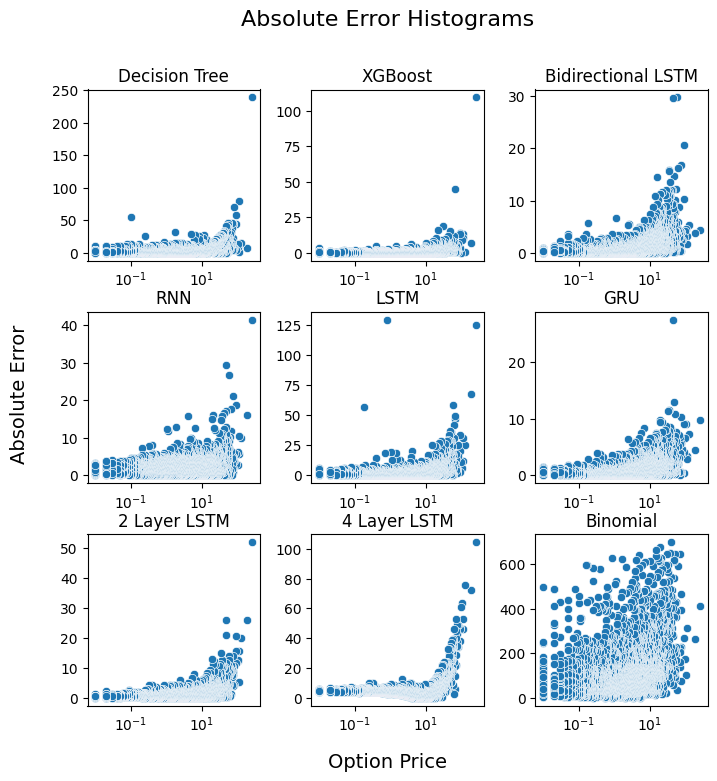

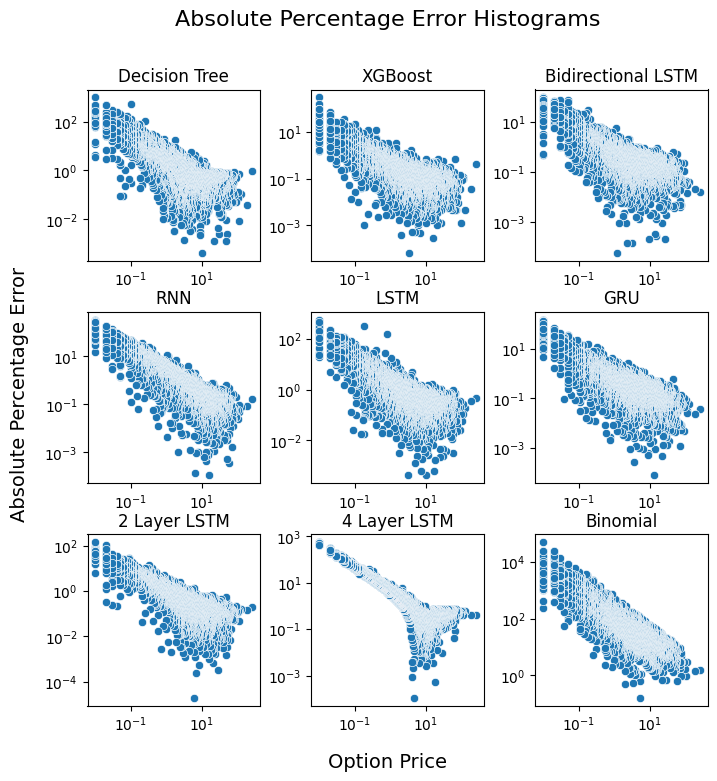

In [103]:
x_value = 'Option Price'
plot_absolute_error(df_filt, x_value, x_log=True, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=True, y_log=True)

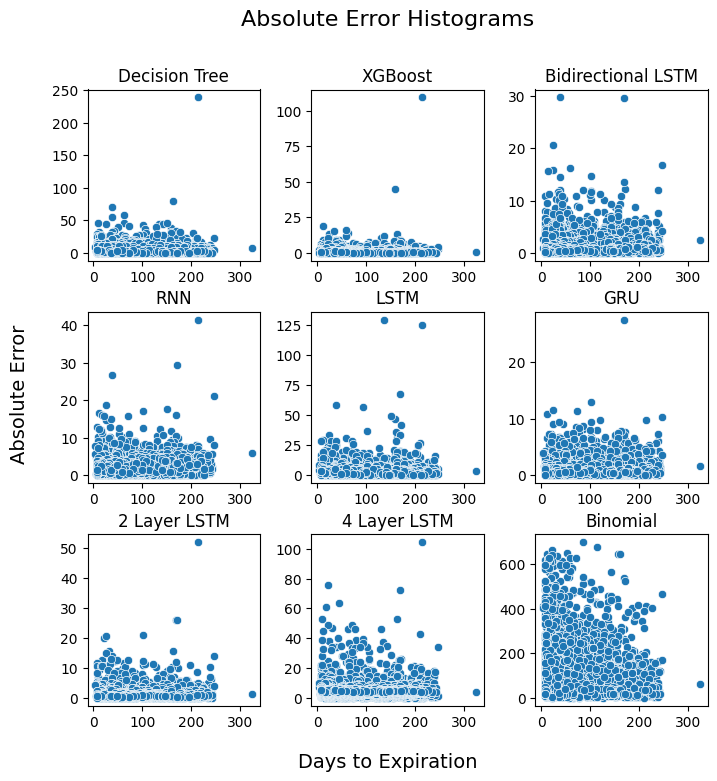

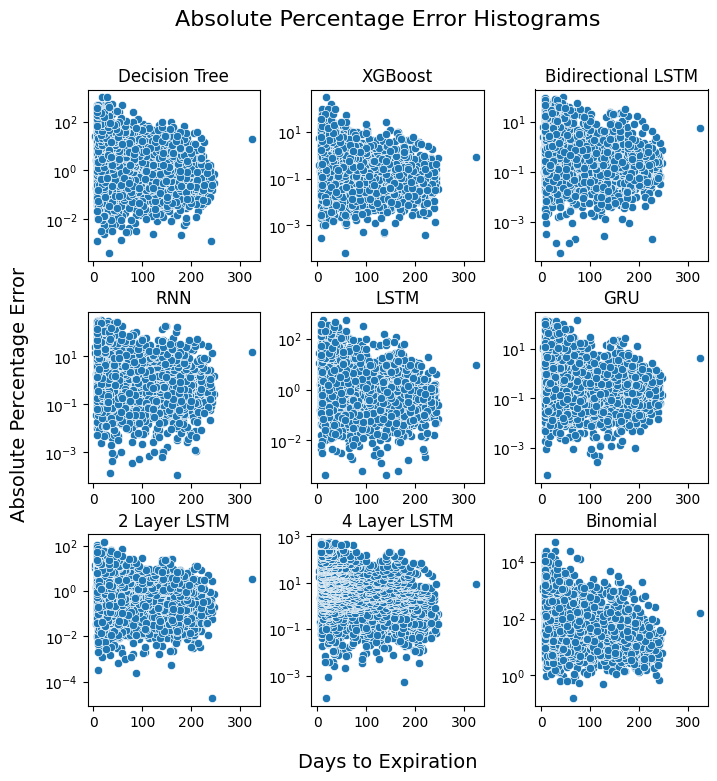

In [104]:
x_value = 'Days to Expiration'
plot_absolute_error(df_filt, x_value, x_log=False, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=False, y_log=True)

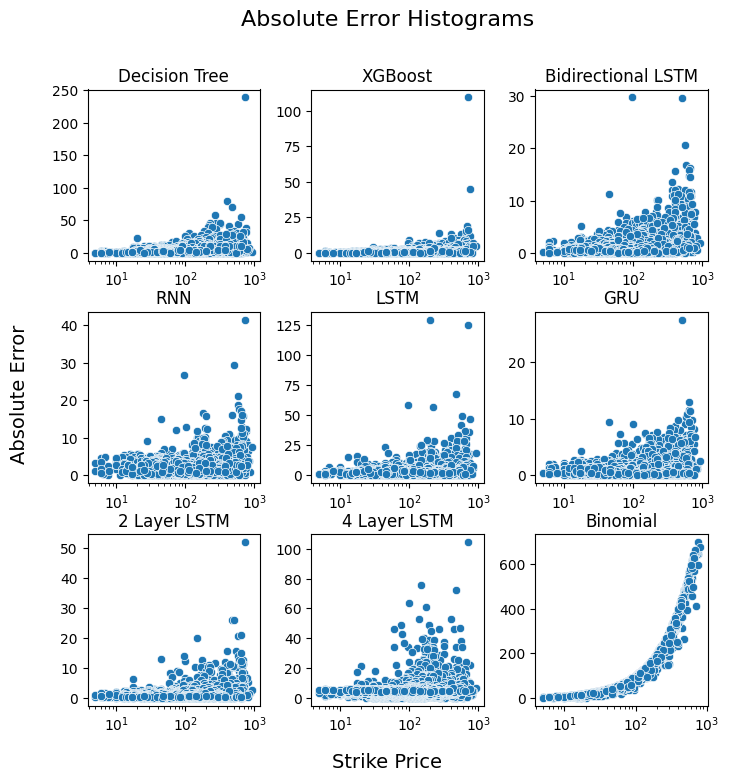

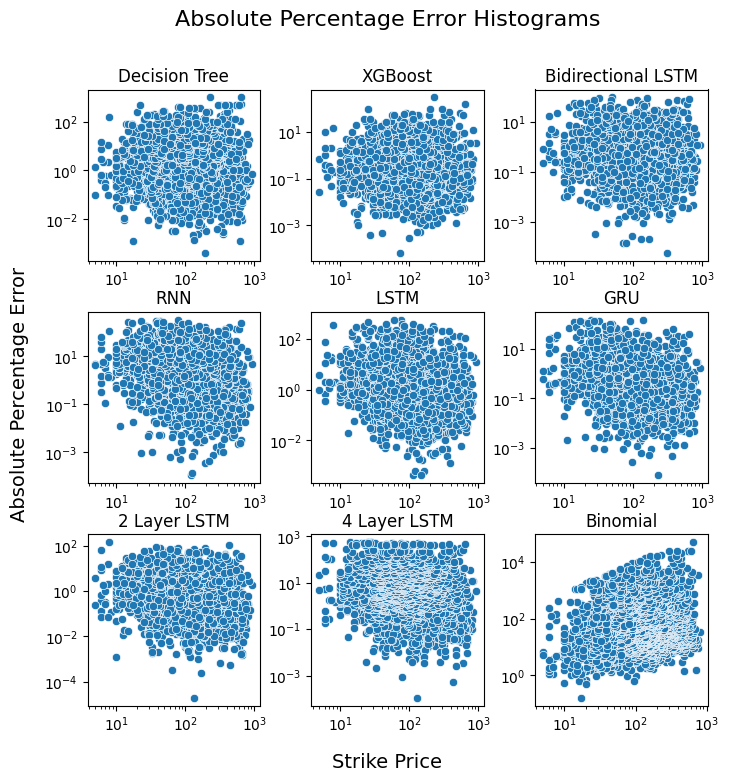

In [105]:
x_value = 'Strike Price'
plot_absolute_error(df_filt, x_value, x_log=True, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=True, y_log=True)

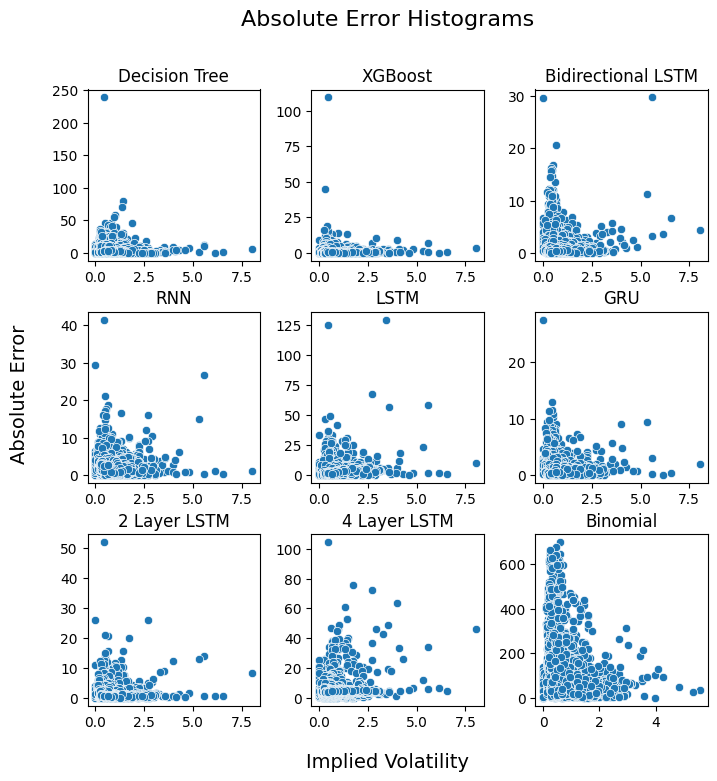

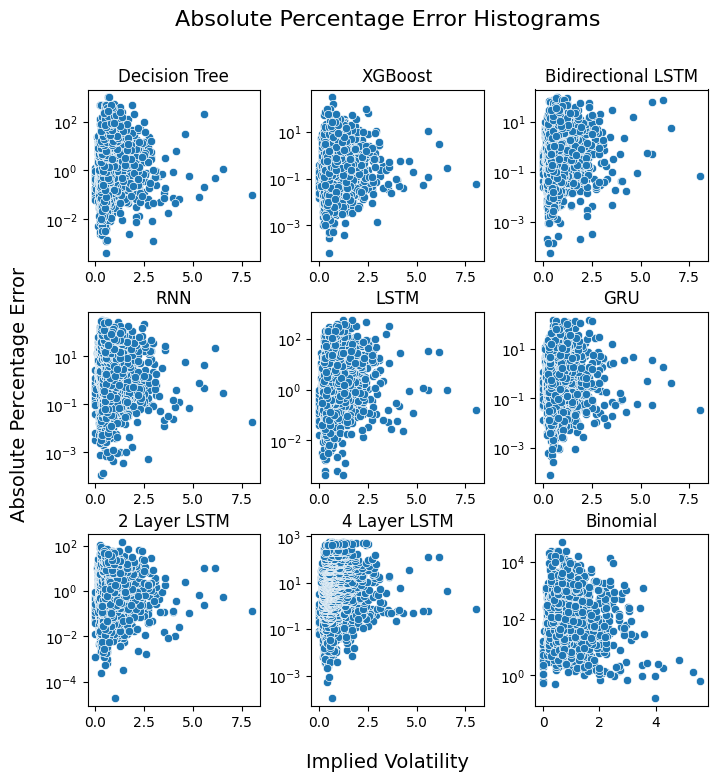

In [106]:
x_value = 'Implied Volatility'
plot_absolute_error(df_filt, x_value, x_log=False, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=False, y_log=True)

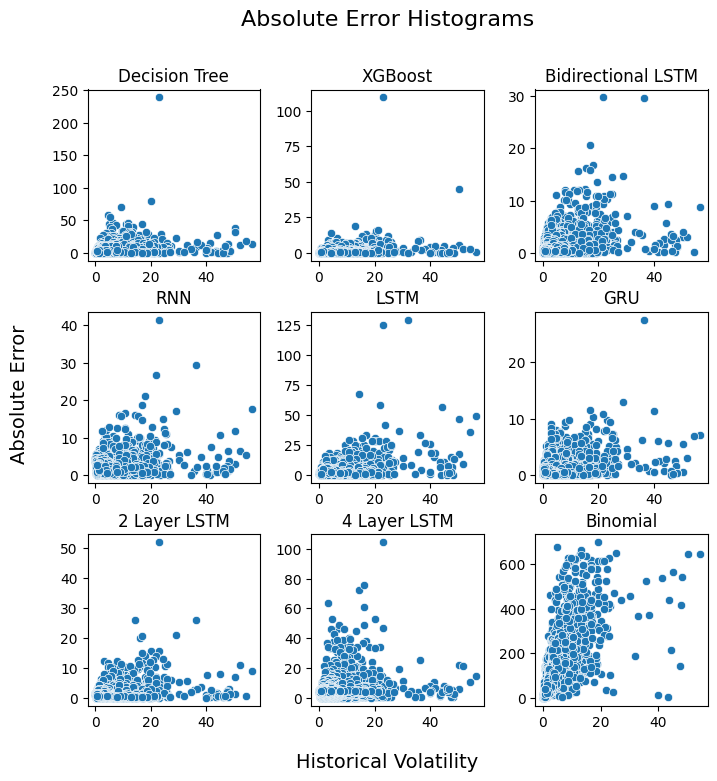

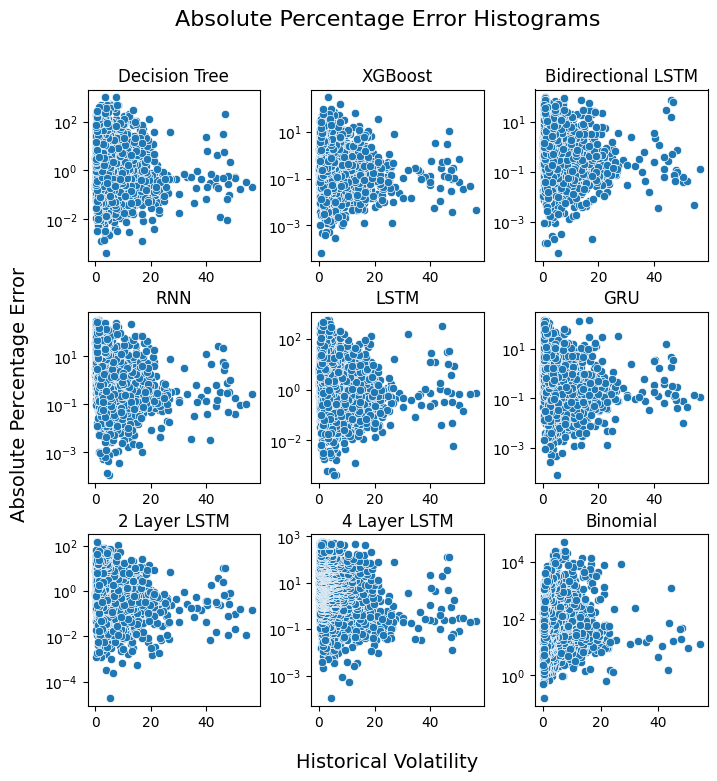

In [107]:
x_value = 'Historical Volatility'
plot_absolute_error(df_filt, x_value, x_log=False, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=False, y_log=True)

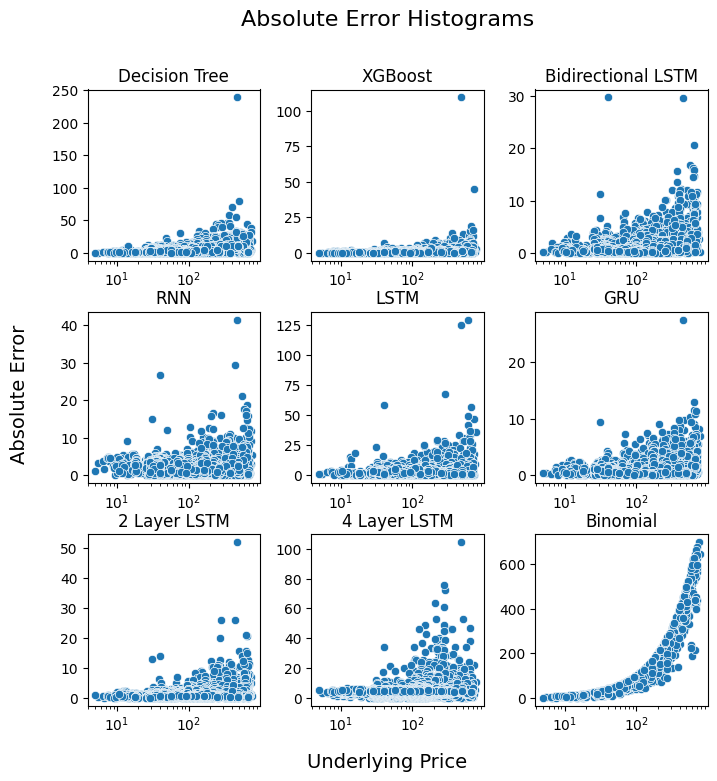

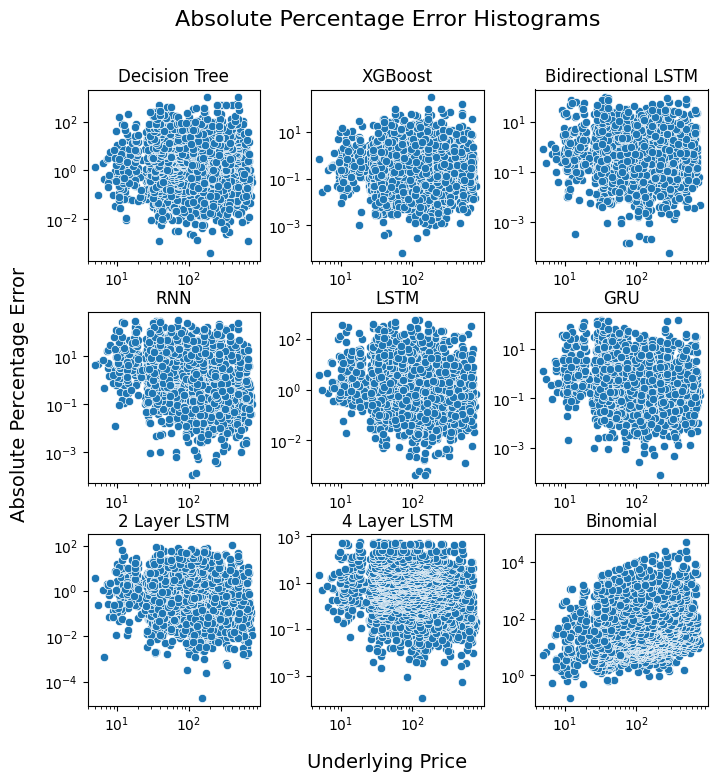

In [108]:
x_value = 'Underlying Price'
plot_absolute_error(df_filt, x_value, x_log=True, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=True, y_log=True)

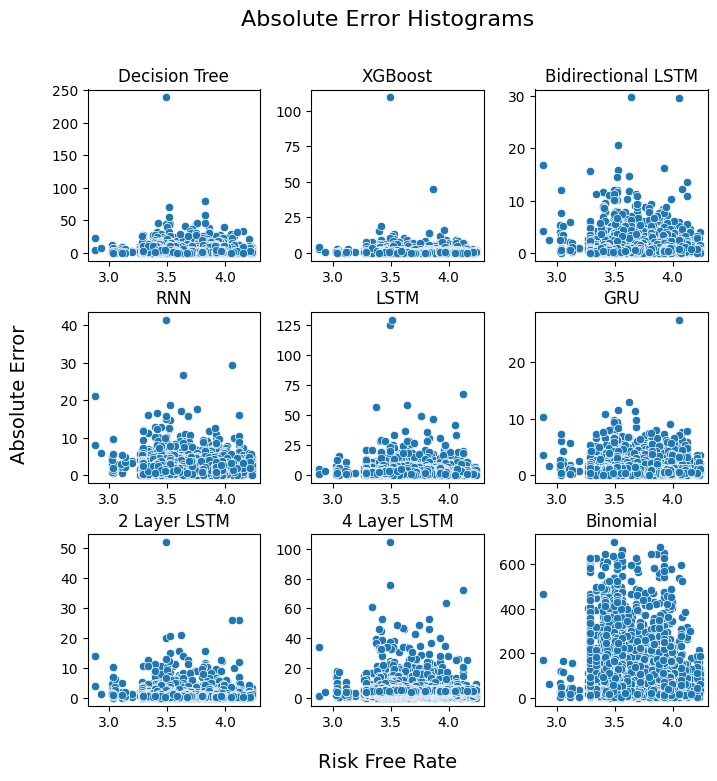

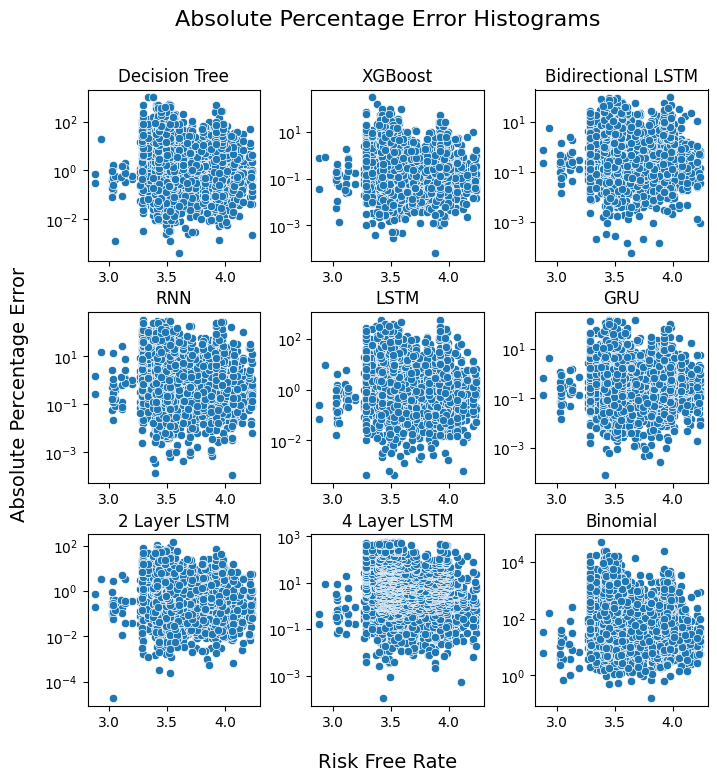

In [109]:
x_value = 'Risk Free Rate'
plot_absolute_error(df_filt, x_value, x_log=False, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=False, y_log=True)

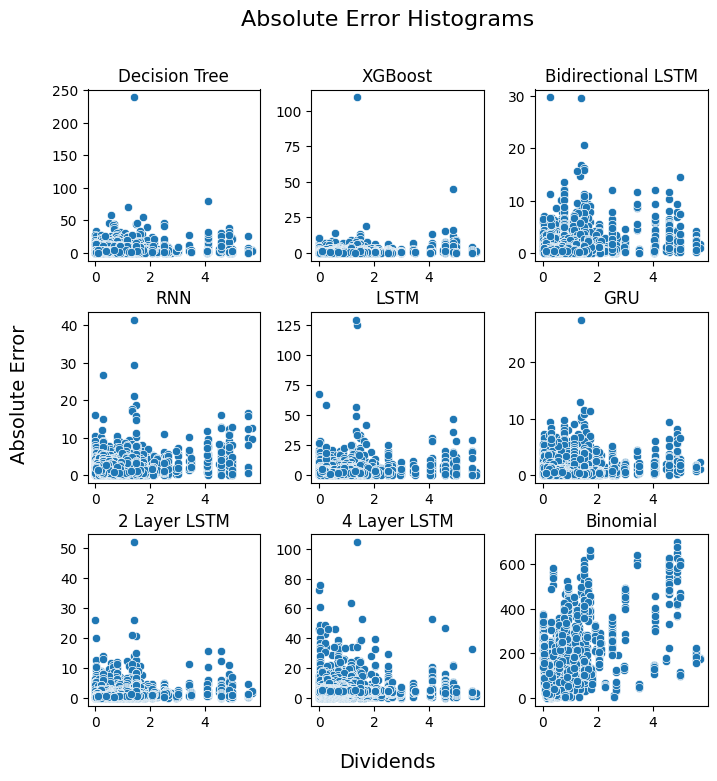

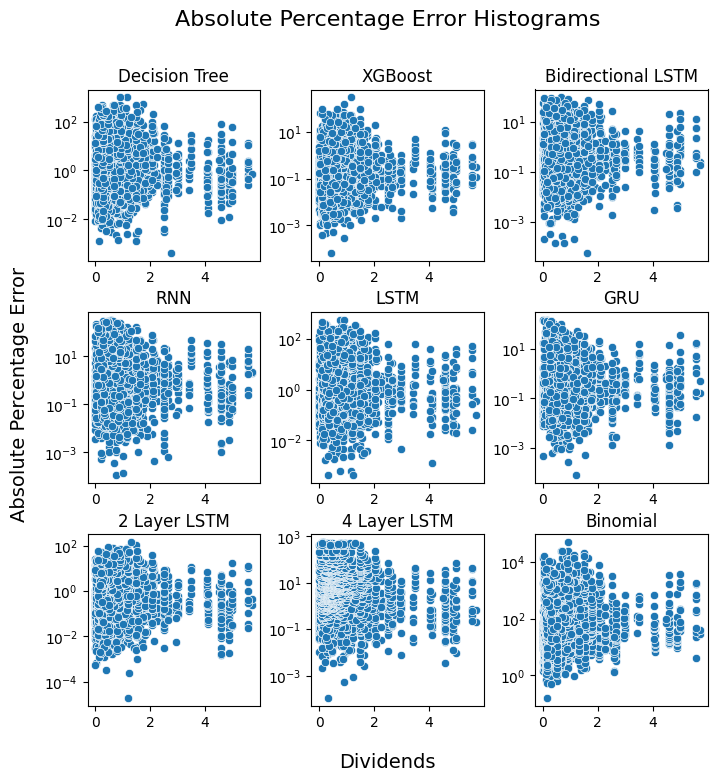

In [110]:
x_value = 'Dividends'
plot_absolute_error(df_filt, x_value, x_log=False, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=False, y_log=True)

In [111]:
df_filt.columns

Index(['ID', 'Date', 'Option Ticker', 'Option Type', 'Option Price',
       'Stock Ticker', 'Days to Expiration', 'Strike Price',
       'Implied Volatility', 'Historical Volatility', 'Underlying Price',
       'Risk Free Rate', 'Dividends', 'DT Absolute Error',
       'XGB Absolute Error', 'RNN Absolute Error', 'LSTM Absolute Error',
       '2 Layer LSTM Absolute Error', '4 Layer LSTM Absolute Error',
       'Bidirectional LSTM Absolute Error', 'GRU Absolute Error',
       'Binomial Absolute Error', 'DT Absolute Percentage Error',
       'XGB Absolute Percentage Error', 'RNN Absolute Percentage Error',
       'LSTM Absolute Percentage Error',
       '2 Layer LSTM Absolute Percentage Error',
       '4 Layer LSTM Absolute Percentage Error',
       'Bidirectional LSTM Absolute Percentage Error',
       'GRU Absolute Percentage Error', 'Binomial Absolute Percentage Error'],
      dtype='object')

In [112]:
# Create a new DataFrame with the Summary Statistics of the Absolute Error of Each Model by Total and Option Type
summary_table = df_filt.groupby('Option Type').describe()[['DT Absolute Error', 'XGB Absolute Error', 'RNN Absolute Error',
                                        'LSTM Absolute Error', '2 Layer LSTM Absolute Error', '4 Layer LSTM Absolute Error',
                                        'Bidirectional LSTM Absolute Percentage Error', 'GRU Absolute Error',
                                        'Binomial Absolute Error']].round(2)
# Add a Totals Row
summary_table.loc['Total'] = summary_table.sum()

In [113]:
summary_table['DT Absolute Error']

,count,mean,std,min,25%,50%,75%,max
Option Type,,,,,,,,
Call,1924.0,4.3,5.68,0.0,1.05,2.47,5.61,79.63
Put,1830.0,3.7,7.47,0.0,0.83,1.85,4.40,239.20
Total,3754.0,8.0,13.15,0.0,1.88,4.32,10.01,318.83


In [114]:
summary_table['XGB Absolute Error']

,count,mean,std,min,25%,50%,75%,max
Option Type,,,,,,,,
Call,1924.0,0.89,1.69,0.0,0.19,0.43,0.99,45.22
Put,1830.0,0.80,2.80,0.0,0.17,0.39,0.84,109.57
Total,3754.0,1.69,4.49,0.0,0.36,0.82,1.83,154.79


In [115]:
summary_table['RNN Absolute Error']

,count,mean,std,min,25%,50%,75%,max
Option Type,,,,,,,,
Call,1924.0,2.77,1.85,0.01,1.68,2.68,3.58,29.44
Put,1830.0,2.43,2.28,0.00,1.02,2.01,3.24,41.43
Total,3754.0,5.20,4.13,0.01,2.70,4.69,6.82,70.87


In [116]:
summary_table['LSTM Absolute Error']

,count,mean,std,min,25%,50%,75%,max
Option Type,,,,,,,,
Call,1924.0,3.06,4.39,0.0,0.78,1.70,3.38,49.05
Put,1830.0,2.88,5.62,0.0,0.83,1.83,3.42,128.99
Total,3754.0,5.94,10.01,0.0,1.61,3.53,6.80,178.04


In [117]:
summary_table['2 Layer LSTM Absolute Error']

,count,mean,std,min,25%,50%,75%,max
Option Type,,,,,,,,
Call,1924.0,1.50,2.03,0.0,0.47,0.92,1.71,25.92
Put,1830.0,1.31,1.85,0.0,0.55,0.91,1.55,52.05
Total,3754.0,2.81,3.88,0.0,1.02,1.83,3.26,77.97


In [118]:
summary_table['4 Layer LSTM Absolute Error']

,count,mean,std,min,25%,50%,75%,max
Option Type,,,,,,,,
Call,1924.0,4.69,6.13,0.00,2.25,3.65,4.30,76.03
Put,1830.0,4.73,4.45,0.01,3.14,4.55,5.31,104.49
Total,3754.0,9.42,10.58,0.01,5.39,8.20,9.61,180.52


In [119]:
summary_table['Bidirectional LSTM Absolute Percentage Error']

,count,mean,std,min,25%,50%,75%,max
Option Type,,,,,,,,
Call,1924.0,1.95,6.73,0.0,0.12,0.28,0.81,98.56
Put,1830.0,1.82,6.58,0.0,0.15,0.30,0.69,95.34
Total,3754.0,3.77,13.31,0.0,0.27,0.58,1.50,193.90


In [120]:
summary_table['GRU Absolute Error']

,count,mean,std,min,25%,50%,75%,max
Option Type,,,,,,,,
Call,1924.0,1.12,1.47,0.0,0.30,0.68,1.38,27.44
Put,1830.0,1.12,1.26,0.0,0.32,0.74,1.39,10.25
Total,3754.0,2.24,2.73,0.0,0.62,1.42,2.77,37.69


In [121]:
summary_table['Binomial Absolute Error']

,count,mean,std,min,25%,50%,75%,max
Option Type,,,,,,,,
Call,1924.0,inf,NaN,4.19,51.19,110.74,253.64,inf
Put,1830.0,131.92,124.79,0.88,41.48,96.19,169.03,697.37
Total,3754.0,inf,124.79,5.07,92.67,206.93,422.67,inf


In [122]:
# Create a new DataFrame with the Summary Statistics of the Absolute Percentage Error of Each Model by Total and Option Type
summary_table = df_filt.groupby('Option Type').describe()[['DT Absolute Percentage Error', 'XGB Absolute Percentage Error', 'RNN Absolute Percentage Error',
                                        'LSTM Absolute Percentage Error', '2 Layer LSTM Absolute Percentage Error', '4 Layer LSTM Absolute Percentage Error',
                                        'Bidirectional LSTM Absolute Percentage Error', 'GRU Absolute Percentage Error',
                                        'Binomial Absolute Error']].round(2)
# Add a Totals Row
summary_table.loc['Total'] = summary_table.sum()

In [123]:
summary_table['DT Absolute Percentage Error']

,count,mean,std,min,25%,50%,75%,max
Option Type,,,,,,,,
Call,1924.0,12.73,55.43,0.0,0.34,0.72,4.36,999.42
Put,1830.0,6.40,25.59,0.0,0.31,0.66,2.85,489.19
Total,3754.0,19.13,81.02,0.0,0.65,1.38,7.21,1488.61


In [124]:
summary_table['XGB Absolute Percentage Error']

,count,mean,std,min,25%,50%,75%,max
Option Type,,,,,,,,
Call,1924.0,1.65,9.79,0.0,0.07,0.19,0.56,311.36
Put,1830.0,1.05,4.53,0.0,0.07,0.17,0.47,97.78
Total,3754.0,2.70,14.32,0.0,0.14,0.36,1.03,409.14


In [125]:
summary_table['RNN Absolute Percentage Error']

,count,mean,std,min,25%,50%,75%,max
Option Type,,,,,,,,
Call,1924.0,9.48,29.03,0.0,0.25,1.12,5.36,332.90
Put,1830.0,4.49,13.79,0.0,0.24,0.84,2.77,222.24
Total,3754.0,13.97,42.82,0.0,0.49,1.96,8.13,555.14


In [126]:
summary_table['LSTM Absolute Percentage Error']

,count,mean,std,min,25%,50%,75%,max
Option Type,,,,,,,,
Call,1924.0,7.25,29.97,0.0,0.27,0.63,2.05,376.04
Put,1830.0,7.70,34.31,0.0,0.25,0.64,2.53,571.86
Total,3754.0,14.95,64.28,0.0,0.52,1.27,4.58,947.90


In [127]:
summary_table['2 Layer LSTM Absolute Percentage Error']

,count,mean,std,min,25%,50%,75%,max
Option Type,,,,,,,,
Call,1924.0,2.45,7.20,0.0,0.14,0.35,1.57,106.05
Put,1830.0,2.29,6.73,0.0,0.13,0.41,1.47,140.74
Total,3754.0,4.74,13.93,0.0,0.27,0.76,3.04,246.79


In [128]:
summary_table['4 Layer LSTM Absolute Percentage Error']

,count,mean,std,min,25%,50%,75%,max
Option Type,,,,,,,,
Call,1924.0,17.59,56.87,0.0,0.39,1.02,6.89,466.71
Put,1830.0,17.58,59.96,0.0,0.38,1.85,8.41,557.08
Total,3754.0,35.17,116.83,0.0,0.77,2.87,15.30,1023.79


In [129]:
summary_table['Bidirectional LSTM Absolute Percentage Error']

,count,mean,std,min,25%,50%,75%,max
Option Type,,,,,,,,
Call,1924.0,1.95,6.73,0.0,0.12,0.28,0.81,98.56
Put,1830.0,1.82,6.58,0.0,0.15,0.30,0.69,95.34
Total,3754.0,3.77,13.31,0.0,0.27,0.58,1.50,193.90


In [130]:
summary_table['GRU Absolute Percentage Error']

,count,mean,std,min,25%,50%,75%,max
Option Type,,,,,,,,
Call,1924.0,2.10,7.82,0.0,0.11,0.29,0.78,104.41
Put,1830.0,2.18,10.76,0.0,0.12,0.30,0.82,151.25
Total,3754.0,4.28,18.58,0.0,0.23,0.59,1.60,255.66


In [131]:
# Create a Table with the Mean Absolute Error from Each Model
mean_absolute_error_table = df_filt.groupby('Option Type').mean()[['DT Absolute Error', 'XGB Absolute Error', 'RNN Absolute Error',
                                        'LSTM Absolute Error', '2 Layer LSTM Absolute Error', '4 Layer LSTM Absolute Error',
                                        'Bidirectional LSTM Absolute Percentage Error', 'GRU Absolute Error',
                                        'Binomial Absolute Error']].round(2)
# Add a Totals Row
mean_absolute_error_table.loc['Total'] = mean_absolute_error_table.mean()

# Rename Columns with the Model Name + MAE
mean_absolute_error_table.columns = ['DT MAE', 'XGB MAE', 'RNN MAE', 'LSTM MAE', '2 Layer LSTM MAE', '4 Layer LSTM MAE',
                                     'Bidirectional LSTM MAE', 'GRU MAE', 'Binomial MAE']

df = mean_absolute_error_table.transpose()
df.sort_values(by='Total', ascending=True)

Option Type,Call,Put,Total
XGB MAE,0.89,0.80,0.845
GRU MAE,1.12,1.12,1.120
2 Layer LSTM MAE,1.50,1.31,1.405
Bidirectional LSTM MAE,1.95,1.82,1.885
RNN MAE,2.77,2.43,2.600
LSTM MAE,3.06,2.88,2.970
DT MAE,4.30,3.70,4.000
4 Layer LSTM MAE,4.69,4.73,4.710
Binomial MAE,NaN,131.92,131.920


In [132]:
# Create a Table with the Mean Absolute Percentage Error from Each Model
mean_absolute_percentage_error_table = df_filt.groupby('Option Type').mean()[['DT Absolute Percentage Error', 'XGB Absolute Percentage Error', 'RNN Absolute Percentage Error',
                                        'LSTM Absolute Percentage Error', '2 Layer LSTM Absolute Percentage Error', '4 Layer LSTM Absolute Percentage Error',
                                        'Bidirectional LSTM Absolute Percentage Error', 'GRU Absolute Percentage Error',
                                        'Binomial Absolute Percentage Error']].round(2)

# Add a Totals Row
mean_absolute_percentage_error_table.loc['Total'] = mean_absolute_percentage_error_table.mean()

# Rename Columns with the Model Name + MAPE
mean_absolute_percentage_error_table.columns = ['DT MAPE', 'XGB MAPE', 'RNN MAPE', 'LSTM MAPE', '2 Layer LSTM MAPE', '4 Layer LSTM MAPE',
                                        'Bidirectional LSTM MAPE', 'GRU MAPE', 'Binomial MAPE']

df = mean_absolute_percentage_error_table.transpose()
df.sort_values(by='Total', ascending=True)

Option Type,Call,Put,Total
XGB MAPE,1.65,1.05,1.350
Bidirectional LSTM MAPE,1.95,1.82,1.885
GRU MAPE,2.10,2.18,2.140
2 Layer LSTM MAPE,2.45,2.29,2.370
RNN MAPE,9.48,4.49,6.985
LSTM MAPE,7.25,7.70,7.475
DT MAPE,12.73,6.40,9.565
4 Layer LSTM MAPE,17.59,17.58,17.585
Binomial MAPE,NaN,272.52,272.520


In [133]:
# Transform Columns from Absolute Error to Squared Error
df_filt['DT Squared Error'] = df_filt['DT Absolute Error'] ** 2
df_filt['XGB Squared Error'] = df_filt['XGB Absolute Error'] ** 2
df_filt['RNN Squared Error'] = df_filt['RNN Absolute Error'] ** 2
df_filt['LSTM Squared Error'] = df_filt['LSTM Absolute Error'] ** 2
df_filt['2 Layer LSTM Squared Error'] = df_filt['2 Layer LSTM Absolute Error'] ** 2
df_filt['4 Layer LSTM Squared Error'] = df_filt['4 Layer LSTM Absolute Error'] ** 2
df_filt['Bidirectional LSTM Squared Error'] = df_filt['Bidirectional LSTM Absolute Error'] ** 2
df_filt['GRU Squared Error'] = df_filt['GRU Absolute Error'] ** 2
df_filt['Binomial Squared Error'] = df_filt['Binomial Absolute Error'] ** 2

# Create Mean Squared Error Table
mean_squared_error_table = df_filt.groupby('Option Type').mean()[['DT Squared Error', 'XGB Squared Error', 'RNN Squared Error',
                                        'LSTM Squared Error', '2 Layer LSTM Squared Error', '4 Layer LSTM Squared Error',
                                        'Bidirectional LSTM Squared Error', 'GRU Squared Error', 'Binomial Squared Error']].round(2)

# Add a Totals Row
mean_squared_error_table.loc['Total'] = mean_squared_error_table.mean()

# Rename Columns with the Model Name + MSE
mean_squared_error_table.columns = ['DT MSE', 'XGB MSE', 'RNN MSE', 'LSTM MSE', '2 Layer LSTM MSE', '4 Layer LSTM MSE',
                                    'Bidirectional LSTM MSE', 'GRU MSE', 'Binomial MSE']

df = mean_squared_error_table.transpose()
df.sort_values(by='Total', ascending=True)

Option Type,Call,Put,Total
GRU MSE,3.42,2.84,3.130
Bidirectional LSTM MSE,4.91,5.33,5.120
2 Layer LSTM MSE,6.38,5.15,5.765
XGB MSE,3.67,8.50,6.085
RNN MSE,11.10,11.14,11.120
LSTM MSE,28.63,39.86,34.245
4 Layer LSTM MSE,59.57,42.20,50.885
DT MSE,50.76,69.35,60.055
Binomial MSE,NaN,32965.54,32965.540
